In [10]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
df = pd.read_csv('parking.csv')

In [13]:
df.head()

,Bldg City,Bldg State,Bldg Status,Property Type,Total Parking Spaces,Owned/Leased
0,HARTFORD,CT,ACTIVE,BUILDING,29,OWNED
1,NEW HAVEN,CT,ACTIVE,BUILDING,0,OWNED
2,WATERBURY,CT,ACTIVE,BUILDING,2,LEASED
3,WILLIMANTIC,CT,ACTIVE,BUILDING,0,LEASED
4,HARTFORD,CT,ACTIVE,BUILDING,103,OWNED


In [14]:
df['Bldg Status'].value_counts()

ACTIVE            8981
EXCESS              70
DECOMMISSIONED       9
Name: Bldg Status, dtype: int64

In [16]:
df['Property Type'].value_counts()

BUILDING     8602
STRUCTURE     339
LAND          119
Name: Property Type, dtype: int64

In [17]:
df['Owned/Leased'].value_counts()

LEASED    6940
OWNED     2120
Name: Owned/Leased, dtype: int64

In [18]:
df.columns

Index(['Bldg City', 'Bldg State', 'Bldg Status', 'Property Type',
       'Total Parking Spaces', 'Owned/Leased'],
      dtype='object')

# 1. What is the distribution or values for owned/Leased

<BarContainer object of 9060 artists>

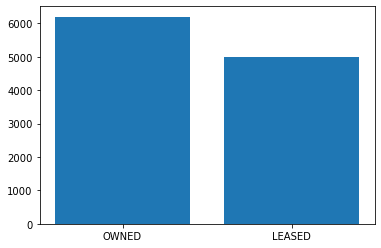

In [19]:
plt.bar(df['Owned/Leased'], df['Total Parking Spaces'])

In [26]:
# Parsing the values for the column of Owned/leased
owned_leased = pd.pivot_table(df, index = 'Owned/Leased', values = 'Total Parking Spaces' ,aggfunc = 'count')
# with the aggfunc, you an also find 'sum','mean'

In [27]:
owned_leased

,Total Parking Spaces
Owned/Leased,
LEASED,6940
OWNED,2120


<AxesSubplot:xlabel='Owned/Leased'>

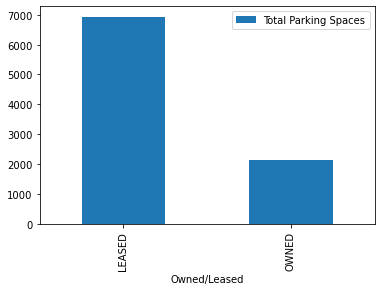

In [28]:
owned_leased.plot(kind = 'bar')

<BarContainer object of 2 artists>

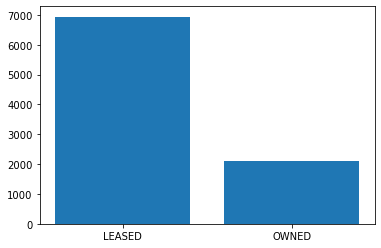

In [30]:
plt.bar(owned_leased.index,owned_leased['Total Parking Spaces'])

# 2. In which blgd state parking situation is in excess-put it in an order

In [31]:
df.head()

,Bldg City,Bldg State,Bldg Status,Property Type,Total Parking Spaces,Owned/Leased
0,HARTFORD,CT,ACTIVE,BUILDING,29,OWNED
1,NEW HAVEN,CT,ACTIVE,BUILDING,0,OWNED
2,WATERBURY,CT,ACTIVE,BUILDING,2,LEASED
3,WILLIMANTIC,CT,ACTIVE,BUILDING,0,LEASED
4,HARTFORD,CT,ACTIVE,BUILDING,103,OWNED


In [32]:
excess_parking = pd.pivot_table(df, index = 'Bldg State', columns = 'Bldg Status', values = 'Total Parking Spaces')

In [33]:
excess_parking

Bldg Status,ACTIVE,DECOMMISSIONED,EXCESS
Bldg State,,,
AL,62.357724,NaN,59.000000
AR,37.000000,NaN,NaN
AZ,32.256757,NaN,NaN
CA,60.493298,NaN,NaN
CO,78.936709,NaN,22.200000
CT,29.327586,NaN,NaN
DC,41.255144,NaN,NaN
DE,15.750000,NaN,NaN
FL,51.905569,NaN,NaN


In [34]:
# Filter the dataset
excess_parking = excess_parking[excess_parking.EXCESS > 0]

In [35]:
excess_parking

Bldg Status,ACTIVE,DECOMMISSIONED,EXCESS
Bldg State,,,
AL,62.357724,NaN,59.000000
CO,78.936709,NaN,22.200000
IL,45.000000,NaN,21.000000
LA,43.684932,NaN,68.666667
MD,104.185090,0.000000,43.166667
MO,121.200000,815.333333,254.272727
NE,54.060000,NaN,19.000000
NJ,32.169118,NaN,4.300000
NV,48.648649,NaN,173.000000


<AxesSubplot:xlabel='Bldg State'>

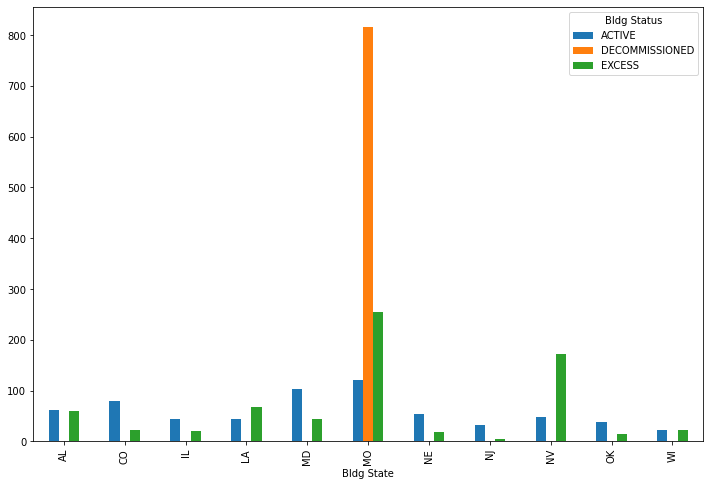

In [90]:
#either show the distribution like this OR use the one below
excess_parking.plot(kind='bar',figsize=(12,8))

<BarContainer object of 11 artists>

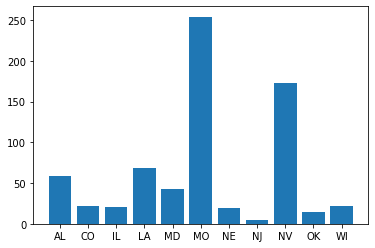

In [38]:
# Another way to show the distribution
plt.bar(excess_parking.index, excess_parking.EXCESS)

In [45]:
excess_parking_sorted = excess_parking.EXCESS.sort_values(ascending=False)

In [46]:
excess_parking_sorted

Bldg State
MO    254.272727
NV    173.000000
LA     68.666667
AL     59.000000
MD     43.166667
CO     22.200000
WI     22.000000
IL     21.000000
NE     19.000000
OK     14.000000
NJ      4.300000
Name: EXCESS, dtype: float64

In [47]:
# plt.bar(excess_parking_sorted.index, excess_parking_sorted.values)

# 3. Bldg Cities that have been decommisioned along with total parking

In [48]:
df.head()

,Bldg City,Bldg State,Bldg Status,Property Type,Total Parking Spaces,Owned/Leased
0,HARTFORD,CT,ACTIVE,BUILDING,29,OWNED
1,NEW HAVEN,CT,ACTIVE,BUILDING,0,OWNED
2,WATERBURY,CT,ACTIVE,BUILDING,2,LEASED
3,WILLIMANTIC,CT,ACTIVE,BUILDING,0,LEASED
4,HARTFORD,CT,ACTIVE,BUILDING,103,OWNED


In [49]:
# Value count on Building status
df['Bldg Status'].value_counts()

ACTIVE            8981
EXCESS              70
DECOMMISSIONED       9
Name: Bldg Status, dtype: int64

In [50]:
# filter the column 'Building status' such that only places where status is decommisioned will be displayed
decom_parking_city = df[df['Bldg Status'] == 'DECOMMISSIONED']

In [51]:
decom_parking_city

,Bldg City,Bldg State,Bldg Status,Property Type,Total Parking Spaces,Owned/Leased
429,PORTHILL,ID,DECOMMISSIONED,BUILDING,0,OWNED
1933,MOOERS,NY,DECOMMISSIONED,BUILDING,0,OWNED
1934,MOOERS,NY,DECOMMISSIONED,BUILDING,0,OWNED
2338,CURTIS BAY,MD,DECOMMISSIONED,BUILDING,0,OWNED
2348,CURTIS BAY,MD,DECOMMISSIONED,BUILDING,0,OWNED
5716,OVERLAND,MO,DECOMMISSIONED,BUILDING,2089,OWNED
5725,SAINT LOUIS,MO,DECOMMISSIONED,BUILDING,357,OWNED
5726,SAINT LOUIS,MO,DECOMMISSIONED,BUILDING,0,OWNED
6752,FORT WORTH,TX,DECOMMISSIONED,BUILDING,0,OWNED


In [54]:
#Filter to show with decommissioned buildings is greater than zero
decom_parking_city = decom_parking_city[decom_parking_city['Total Parking Spaces'] > 0]

In [55]:
decom_parking_city

,Bldg City,Bldg State,Bldg Status,Property Type,Total Parking Spaces,Owned/Leased
5716,OVERLAND,MO,DECOMMISSIONED,BUILDING,2089,OWNED
5725,SAINT LOUIS,MO,DECOMMISSIONED,BUILDING,357,OWNED


<AxesSubplot:>

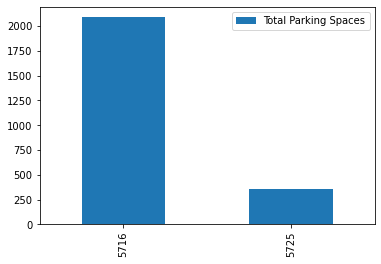

In [56]:
decom_parking_city.plot(kind='bar')

# 4. In which type of property parking space is in Excess

In [57]:
df.head()

,Bldg City,Bldg State,Bldg Status,Property Type,Total Parking Spaces,Owned/Leased
0,HARTFORD,CT,ACTIVE,BUILDING,29,OWNED
1,NEW HAVEN,CT,ACTIVE,BUILDING,0,OWNED
2,WATERBURY,CT,ACTIVE,BUILDING,2,LEASED
3,WILLIMANTIC,CT,ACTIVE,BUILDING,0,LEASED
4,HARTFORD,CT,ACTIVE,BUILDING,103,OWNED


In [59]:
# Only give those rows where building status is excess.by default,it calculates the mean
excess_parking_property = pd.pivot_table(df[df['Bldg Status']=='EXCESS'], index = 'Property Type', values = 'Total Parking Spaces')

In [60]:
excess_parking_property

,Total Parking Spaces
Property Type,
BUILDING,57.791045
STRUCTURE,37.000000


In [62]:
## using aggfunc to get the sum..You can also input the 'count' option for this code
excess_parking_property1 = pd.pivot_table(df[df['Bldg Status']=='EXCESS'], index = 'Property Type', values = 'Total Parking Spaces', aggfunc = 'sum')

In [63]:
excess_parking_property1

,Total Parking Spaces
Property Type,
BUILDING,3872
STRUCTURE,111


<AxesSubplot:xlabel='Property Type'>

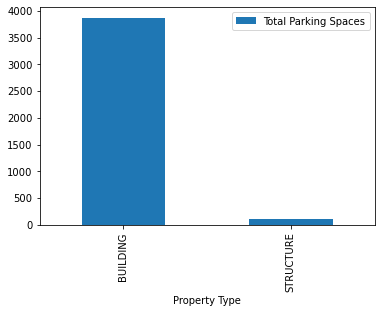

In [64]:
excess_parking_property.plot(kind='bar')

# 5. Where is more active parking-owned/leased

In [66]:
df.head()

,Bldg City,Bldg State,Bldg Status,Property Type,Total Parking Spaces,Owned/Leased
0,HARTFORD,CT,ACTIVE,BUILDING,29,OWNED
1,NEW HAVEN,CT,ACTIVE,BUILDING,0,OWNED
2,WATERBURY,CT,ACTIVE,BUILDING,2,LEASED
3,WILLIMANTIC,CT,ACTIVE,BUILDING,0,LEASED
4,HARTFORD,CT,ACTIVE,BUILDING,103,OWNED


In [67]:
active_parking = pd.pivot_table(df[df['Bldg Status']=='ACTIVE'], index = 'Owned/Leased', values = 'Total Parking Spaces')

In [68]:
active_parking

,Total Parking Spaces
Owned/Leased,
LEASED,44.707349
OWNED,74.365997


<AxesSubplot:xlabel='Owned/Leased'>

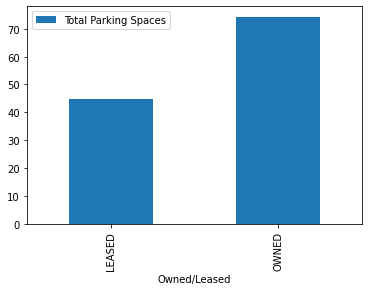

In [69]:
active_parking.plot(kind='bar')

In [70]:
active_parking.sum()

Total Parking Spaces    119.073346
dtype: float64

In [71]:
# how to find percentage of each of owned/leased to the total?
active_parking['Total Parking Spaces']/ active_parking['Total Parking Spaces'].sum()

Owned/Leased
LEASED    0.375461
OWNED     0.624539
Name: Total Parking Spaces, dtype: float64

In [72]:
active_parking

,Total Parking Spaces
Owned/Leased,
LEASED,44.707349
OWNED,74.365997


In [73]:
## Adding a column to show this percentages
active_parking['%contri'] = active_parking['Total Parking Spaces']/ active_parking['Total Parking Spaces'].sum()

In [74]:
active_parking

,Total Parking Spaces,%contri
Owned/Leased,,
LEASED,44.707349,0.375461
OWNED,74.365997,0.624539


# 6. States with more leased parking

In [75]:
df.head()

,Bldg City,Bldg State,Bldg Status,Property Type,Total Parking Spaces,Owned/Leased
0,HARTFORD,CT,ACTIVE,BUILDING,29,OWNED
1,NEW HAVEN,CT,ACTIVE,BUILDING,0,OWNED
2,WATERBURY,CT,ACTIVE,BUILDING,2,LEASED
3,WILLIMANTIC,CT,ACTIVE,BUILDING,0,LEASED
4,HARTFORD,CT,ACTIVE,BUILDING,103,OWNED


In [77]:
state_leased_parking = pd.pivot_table(df[df['Owned/Leased']=='LEASED'], index = 'Bldg State', values = 'Total Parking Spaces')

In [80]:
state_leased_parking.sort_values('Total Parking Spaces', ascending = False)

,Total Parking Spaces
Bldg State,
MO,107.762821
TX,73.457086
VA,72.476316
AL,64.055556
UT,62.505882
GA,62.425414
CO,58.647727
VT,56.128205
NM,51.926316


# 7. Which property Type has more Active parking?

In [92]:
df.head()

,Bldg City,Bldg State,Bldg Status,Property Type,Total Parking Spaces,Owned/Leased
0,HARTFORD,CT,ACTIVE,BUILDING,29,OWNED
1,NEW HAVEN,CT,ACTIVE,BUILDING,0,OWNED
2,WATERBURY,CT,ACTIVE,BUILDING,2,LEASED
3,WILLIMANTIC,CT,ACTIVE,BUILDING,0,LEASED
4,HARTFORD,CT,ACTIVE,BUILDING,103,OWNED


In [93]:
active_parking_type = pd.pivot_table(df[df['Bldg Status']=='ACTIVE'], index = 'Property Type', values = 'Total Parking Spaces')

In [94]:
active_parking_type

,Total Parking Spaces
Property Type,
BUILDING,51.134764
LAND,19.268908
STRUCTURE,70.779762


<AxesSubplot:xlabel='Property Type'>

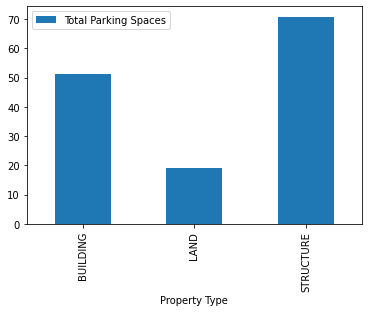

In [95]:
active_parking_type.plot(kind='bar')

# 8. How is the distribution of parking in city by Property type?

In [96]:
df.head()

,Bldg City,Bldg State,Bldg Status,Property Type,Total Parking Spaces,Owned/Leased
0,HARTFORD,CT,ACTIVE,BUILDING,29,OWNED
1,NEW HAVEN,CT,ACTIVE,BUILDING,0,OWNED
2,WATERBURY,CT,ACTIVE,BUILDING,2,LEASED
3,WILLIMANTIC,CT,ACTIVE,BUILDING,0,LEASED
4,HARTFORD,CT,ACTIVE,BUILDING,103,OWNED


In [ ]:
city_parking_type = pd.pivot_table(df[df['Bldg Status']=='ACTIVE'], index = 'Property Type', values = 'Total Parking Spaces')

# 9. Building states which has zero parking spaces?

In [118]:
states_zero_spaces = pd.pivot_table(df[df['Total Parking Spaces']==0], index = 'Bldg State', values = 'Total Parking Spaces')

In [119]:
states_zero_spaces

,Total Parking Spaces
Bldg State,
AL,0
AR,0
AZ,0
CA,0
CO,0
CT,0
DC,0
DE,0
FL,0


# 10. What are those states which has maximum and minimum parking space?

In [99]:
state_leased_parking.head()

,Total Parking Spaces
Bldg State,
AL,64.055556
AR,28.098592
AZ,38.025806
CA,44.639810
CO,58.647727


In [106]:
# Another way to get max in DF
(state_leased_parking[state_leased_parking['Total Parking Spaces']==state_leased_parking['Total Parking Spaces'].max()])

,Total Parking Spaces
Bldg State,
MO,107.762821


In [103]:
(state_leased_parking[state_leased_parking['Total Parking Spaces']==state_leased_parking['Total Parking Spaces'].min()])

,Total Parking Spaces
Bldg State,
ND,10.477273
